# Testing confidence intervals
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
from ROOT import *
import numpy as np
from array import array
from scipy.stats import poisson

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### (1) ROOT settings

In [2]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


### (2) Definition of unified probability interval

Assuming Poisson probability distribution for signal + background

In [3]:
# Return unified interval corresponsing to given CL

# Fixed background level

bg = 3.0

def problim(mean,cl):
    
# Find sum range required for % level precision

    prec = 0.01*(1-cl)

    nmin = poisson.isf(1-prec,bg+mean)
    nmax = poisson.isf(prec,bg+mean)

# Considered interval candidates

    ntab = np.linspace(nmin,nmax,int(nmax-nmin+1.5))
    ptab = poisson.pmf(ntab,bg+mean)

# Highest likelihood for each candidate

    mbest = (ntab - bg) * (ntab > bg)
    pbest = poisson.pmf(ntab,bg+mbest)
    
# Sort candidates according to the probability ratio

    prat = ptab/pbest
    
    isort= np.argsort(prat)

    nlo=nmax
    nhi=nmin
    psum=0
    
    for ip in reversed(isort):
        psum += ptab[ip]
        if(nlo>ntab[ip]): nlo=ntab[ip]
        if(nhi<ntab[ip]): nhi=ntab[ip]
#        print(ip,psum,ntab[ip],ptab[ip],mbest[ip],pbest[ip],prat[ip])
        if(psum>cl): break
        
    return nlo,nhi

# Help function to check coverage

def probsum(mean,n1,n2):
    nn = np.linspace(n1,n2,int(n2-n1+1.5))
    pn=poisson.pmf(nn,bg+mean)
    return np.sum(pn)


### (3) Define set of hypothesis

In [4]:
# Considered values of true mean

# vmean = np.linspace(0.5,14.5,29)
vmean = np.linspace(0.1,14.9,149)
# vmean = np.linspace(0.02,14.98,749)
# vmean = np.linspace(0.01,14.99,1499)

CL = 0.90         

# Upper an lower edges of x probability intervals

vlow = np.empty(vmean.size)
vhig = np.empty(vmean.size)

for im in range(vmean.size):
    vlow[im],vhig[im] = problim(vmean[im],CL)


### (4)  Print interval information

In [5]:
print("\nProbability intervals for x:")

print("\n  true mean     n_low     n_high    CL_low      CL_high     CL")

for im in range(vmean.size) :
    lcl = 1 - probsum(vmean[im],0,vlow[im]-1)
    hcl = probsum(vmean[im],0,vhig[im])
    tcl = probsum(vmean[im],vlow[im],vhig[im])
    
# For test
# hcl = 1 - probsum(vmean[im],0,vlow[im])
# lcl = probsum(vmean[im],0,vhig[im]-1)

    print ("%10.3f   %8.3f  %8.3f     %8.6f    %8.6f    %8.6f" % (vmean[im],vlow[im],vhig[im],lcl,hcl,tcl))



Probability intervals for x:

  true mean     n_low     n_high    CL_low      CL_high     CL
     0.100      0.000     5.000     1.000000    0.905666    0.905666
     0.200      0.000     6.000     1.000000    0.955381    0.955381
     0.300      0.000     6.000     1.000000    0.949034    0.949034
     0.400      0.000     6.000     1.000000    0.942147    0.942147
     0.500      0.000     6.000     1.000000    0.934712    0.934712
     0.600      0.000     6.000     1.000000    0.926727    0.926727
     0.700      0.000     6.000     1.000000    0.918191    0.918191
     0.800      0.000     6.000     1.000000    0.909108    0.909108
     0.900      0.000     7.000     1.000000    0.954598    0.954598
     1.000      1.000     7.000     0.981684    0.948866    0.930551
     1.100      1.000     7.000     0.983427    0.942688    0.926115
     1.200      1.000     7.000     0.985004    0.936057    0.921061
     1.300      1.000     7.000     0.986431    0.928968    0.915400
     1.40

### (5) Draw probability intervals

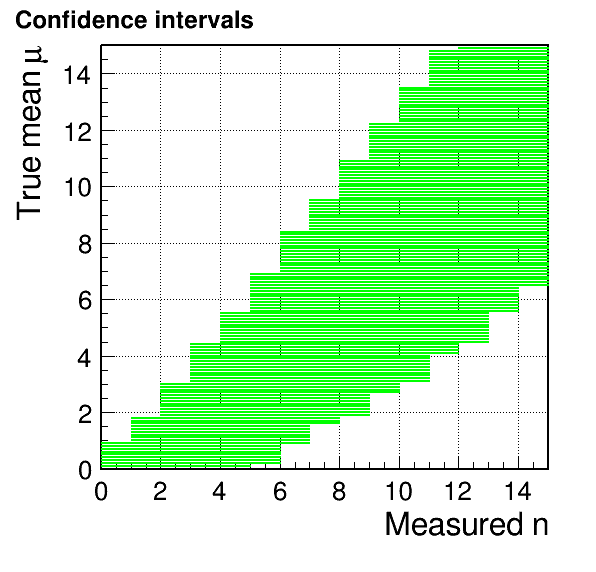

Info in <TCanvas::Print>: png file 06_poisson_interval3_90_1_149.png has been created


In [6]:
# Lin scale

gStyle.SetOptLogy(0)

# Create plot canvas

gStyle.SetCanvasDefH(600)  # To match that in the paper

cexp = TCanvas('cexp')
   
# Histogram to produce frame

Xmin=0
Xmax=15
Ymin=0
Ymax=15

hexp = TH1D('hexp','Confidence intervals',10, Xmin, Xmax)

hexp.GetXaxis().SetTitle("Measured n")
hexp.GetYaxis().SetTitle("True mean #mu")
hexp.SetMinimum(Ymin)
hexp.SetMaximum(Ymax)
hexp.SetLineWidth(0)    # To suppress horizontal line at zero

# No statistics

hexp.SetStats(0)

# Plot empty histogram (frame)

hexp.SetMarkerStyle(20)
hexp.DrawCopy('HIST')

# Overlay probability interval lines

lint = TLine()
lint.SetLineColor(3)
lint.SetLineWidth(2)

for im in range(vmean.size) :
    vl=max(vlow[im],Xmin)
    vh=min(vhig[im],Xmax)
    lint.DrawLine(vl,vmean[im],vh,vmean[im])

cexp.Update()
fname = '06_poisson_interval3_90_1_'+str(vmean.size)+'.png'
cexp.Print(fname)

Image(filename=fname)

### (6) Generate limit graphs

In [7]:
lgr = TGraph(vmean.size,array('d',vlow),array('d',vmean))
hgr = TGraph(vmean.size,array('d',vhig),array('d',vmean))

# Set graph options

lgr.SetNameTitle("lgr","Lower edge of x probability interval")
hgr.SetNameTitle("hgr","Upper edge of x probability interval")

lgr.SetMarkerStyle(20)
lgr.SetMarkerSize(0.7)
lgr.SetMarkerColor(2)
lgr.SetLineColor(2)
lgr.SetLineWidth(2)

hgr.SetMarkerStyle(20)
hgr.SetMarkerSize(0.7)
hgr.SetMarkerColor(4)
hgr.SetLineColor(4)
hgr.SetLineWidth(2)


### (7) Plot results

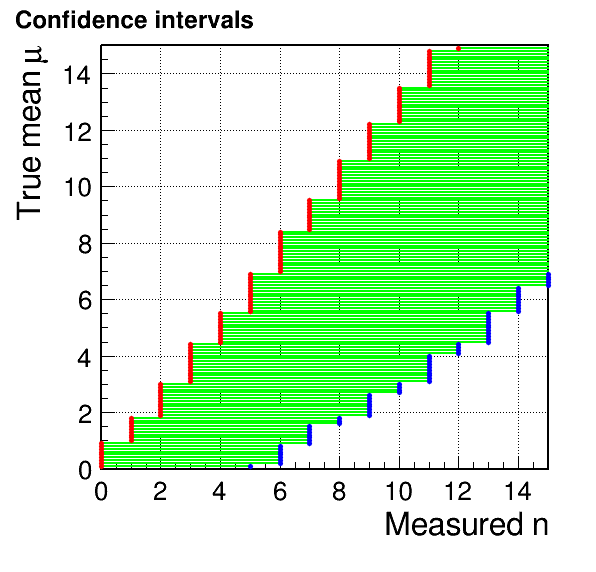

Info in <TCanvas::Print>: png file 06_poisson_interval3_90_2_149.png has been created


In [8]:
# Plot limit graphs

lgr.Draw('P')
hgr.Draw('P')

# Store and show

cexp.Update()
fname = '06_poisson_interval3_90_2_'+str(vmean.size)+'.png'
cexp.Print(fname)

Image(filename=fname)

### (8) Hypothetical measurement

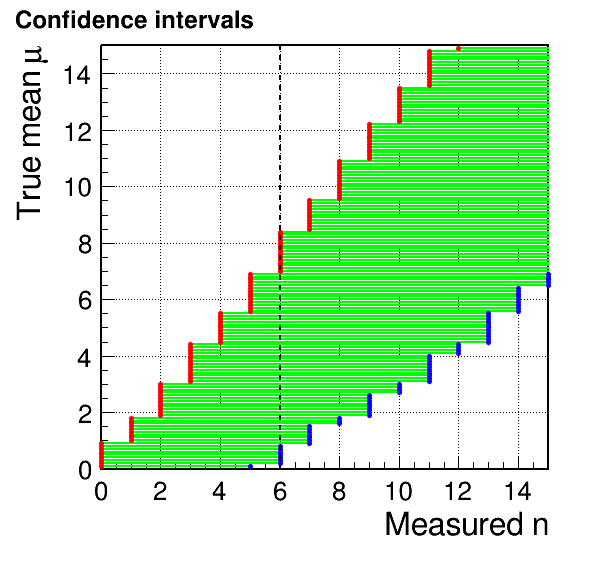

Info in <TCanvas::Print>: png file 06_poisson_interval3_90_3_149.png has been created


In [9]:
Xm = 6

lxm = TLine()
lxm.SetLineColor(1)
lxm.SetLineWidth(2)
lxm.SetLineStyle(7)

lxm.DrawLine(Xm,Ymin,Xm,Ymax)

cexp.Update()
fname = '06_poisson_interval3_90_3_'+str(vmean.size)+'.png'
cexp.Print(fname)

Image(filename=fname)

In [10]:
# Look for proper point in limit table

for im in range(vmean.size-1) :
    if Xm >= vlow[im] and Xm < vlow[im+1]:
        print('Upper limit : ',vmean[im])
    if Xm > vhig[im] and Xm <= vhig[im+1]:
        frac = (Xm-vhig[im])/(vhig[im+1]-vhig[im])
        print('Lower limit : ',vmean[im+1])        

Lower limit :  0.2
Upper limit :  8.4
